# Convert an emd image file to a tiff image file displayable in Windows
* load emd file
* display the image data
* save the image with original number of bits per pixel (metadata gets also saved)
* convert a copy of the image to 16 bit per pixel
    * 16 bit per pixel can be display by Windows 10 & 11, higher bit numbers can't be displayed
    * Disclaimer: Lowering the number of bits can decrease the dynamic range of the image leading to loss of information
* save copy also as tiff file 
    * this file can be displayed in Windows (tested with Windows 10 and Windows 11)
Disclaimer: This Juypter Notebook works for images (2 dimensions). emd files can also store more dimensions, e.g. 3 dimensions for image stacks.

Data from https://doi.org/10.34894/EIOXPT, file: "Fig 1b-DPC HAADF-DF4 4.9 Mx.emd"

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs # tested with hyperspy version 2.0

In [2]:
img_folder = r'C:\Users\JMe\Downloads'
img_name = r'Fig 1b-DPC HAADF-DF4 4.9 Mx.emd' 
img_path = os.path.join(img_folder, img_name)
# create image name for tiff file
img_name_save = img_name.split('.emd')[0]
img_path_save = os.path.join(img_folder, img_name_save)
img_name_save

'Fig 1b-DPC HAADF-DF4 4.9 Mx'

In [3]:
img = hs.load(img_path)
img

[<Signal2D, title: dDPC, dimensions: (|2048, 2048)>,
 <Signal2D, title: Unrecognized_image_signal, dimensions: (|2048, 2048)>,
 <ComplexSignal2D, title: Half FFT, dimensions: (|545, 1089)>,
 <Signal2D, title: DF4 SUM, dimensions: (|2048, 2048)>,
 <Signal2D, title: B-D, dimensions: (|2048, 2048)>,
 <Signal2D, title: iDPC, dimensions: (|2048, 2048)>,
 <Signal2D, title: HAADF, dimensions: (|2048, 2048)>,
 <Signal2D, title: A-C, dimensions: (|2048, 2048)>,
 <Signal2D, title: Unrecognized_image_signal, dimensions: (|2048, 2048)>]

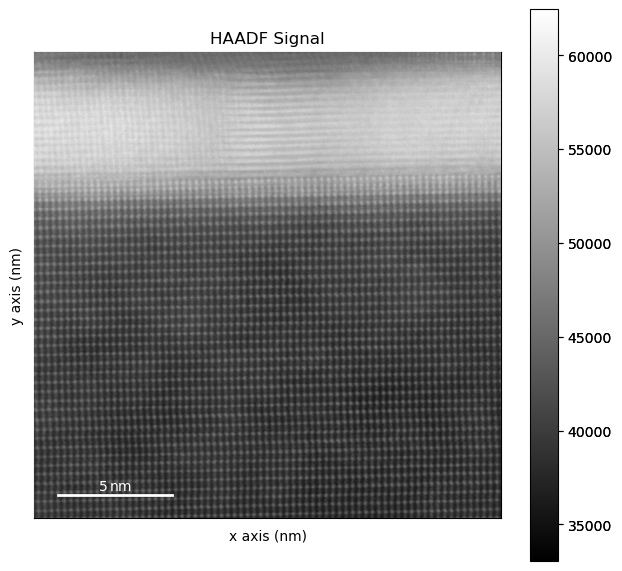

In [4]:
img[6].plot()

In [5]:
# img_metadata = img[6].original_metadata # get all metadata
# img.metadata.export('metadata.txt') # export metadata to text file
# crop image
# img_crop = img[6].deepcopy() # create a copy of the original image first
# img_crop.crop(axis = 0, start = 500, end = 1000)
# img_crop.crop(axis = 1, start = 500, end = 1000)

In [6]:
img[6].data.dtype

dtype('float64')

In [7]:
img[6].save(img_path_save + '.tiff')

In [8]:
# convert image to from 64 bit (float64) to 16 bit unsigned integers (u2) (u2 can be displayed by Windows and ImageJ/Fiji)
img_copy =  img[6].deepcopy()
img_copy.change_dtype('u2')
img_copy.save(img_path_save + '_u2.tiff')